In [1]:
import pandas as pd
import datetime
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Importing data

In [2]:
tsla = pd.read_csv('C:/Users/dimit/Downloads/TSLA.csv')
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1762 non-null   object 
 1   Open       1762 non-null   float64
 2   High       1762 non-null   float64
 3   Low        1762 non-null   float64
 4   Close      1762 non-null   float64
 5   Adj Close  1762 non-null   float64
 6   Volume     1762 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.5+ KB


In [3]:
tsla.set_index("Date",inplace = True)

In [4]:
tsla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,44.574001,44.650002,42.652000,43.862000,43.862000,23822000
2015-01-05,42.910000,43.299999,41.431999,42.018002,42.018002,26842500
2015-01-06,42.012001,42.840000,40.841999,42.256001,42.256001,31309500
2015-01-07,42.669998,42.956001,41.956001,42.189999,42.189999,14842000
2015-01-08,42.562000,42.759998,42.001999,42.124001,42.124001,17212500
...,...,...,...,...,...,...
2021-12-23,1006.799988,1072.979980,997.559998,1067.000000,1067.000000,30904400
2021-12-27,1073.670044,1117.000000,1070.719971,1093.939941,1093.939941,23715300
2021-12-28,1109.489990,1119.000000,1078.420044,1088.469971,1088.469971,20108000


# Labelling the dataset for the trading strategies - setting target variable y

## Strategy 1

In [5]:
df1 = tsla.copy()

In [6]:
df1['Adj Close next day'] = df1['Adj Close'].shift(periods=-1)

In [7]:
df1.head()

,Open,High,Low,Close,Adj Close,Volume,Adj Close next day
Date,,,,,,,
2015-01-02,44.574001,44.650002,42.652000,43.862000,43.862000,23822000,42.018002
2015-01-05,42.910000,43.299999,41.431999,42.018002,42.018002,26842500,42.256001
2015-01-06,42.012001,42.840000,40.841999,42.256001,42.256001,31309500,42.189999
2015-01-07,42.669998,42.956001,41.956001,42.189999,42.189999,14842000,42.124001
2015-01-08,42.562000,42.759998,42.001999,42.124001,42.124001,17212500,41.332001


In [8]:
df1['y'] = 0

In [9]:
df1['y'] = np.where(df1['Adj Close'].shift(-1)>df1['Adj Close'],1,-1)

In [10]:
df1

,Open,High,Low,Close,Adj Close,Volume,Adj Close next day,y
Date,,,,,,,,
2015-01-02,44.574001,44.650002,42.652000,43.862000,43.862000,23822000,42.018002,-1
2015-01-05,42.910000,43.299999,41.431999,42.018002,42.018002,26842500,42.256001,1
2015-01-06,42.012001,42.840000,40.841999,42.256001,42.256001,31309500,42.189999,-1
2015-01-07,42.669998,42.956001,41.956001,42.189999,42.189999,14842000,42.124001,-1
2015-01-08,42.562000,42.759998,42.001999,42.124001,42.124001,17212500,41.332001,-1
...,...,...,...,...,...,...,...,...
2021-12-23,1006.799988,1072.979980,997.559998,1067.000000,1067.000000,30904400,1093.939941,1
2021-12-27,1073.670044,1117.000000,1070.719971,1093.939941,1093.939941,23715300,1088.469971,-1
2021-12-28,1109.489990,1119.000000,1078.420044,1088.469971,1088.469971,20108000,1086.189941,-1


## Strategy 2

In [11]:
df2 = tsla.copy()

<AxesSubplot:xlabel='Date'>

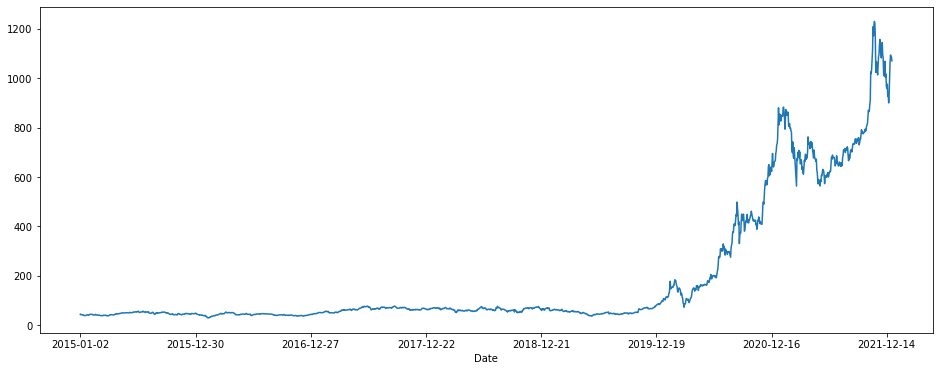

In [12]:
df2["Adj Close"].plot(figsize = (16,6))

<AxesSubplot:xlabel='Date'>

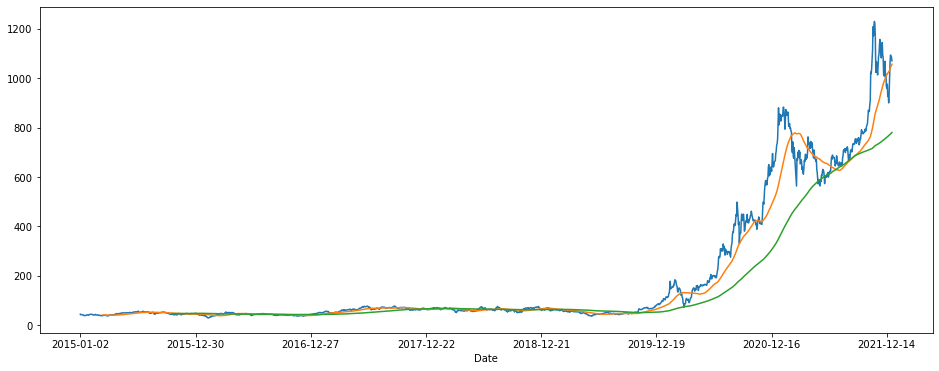

In [13]:
df2["Adj Close"].plot()
df2.rolling(50).mean()["Adj Close"].plot(figsize=(16,6))
df2.rolling(200).mean()["Adj Close"].plot(figsize=(16,6))

In [14]:
df2['50DMA'] = df2["Adj Close"].rolling(50).mean()
df2['200DMA'] = df2["Adj Close"].rolling(200).mean()
df2

,Open,High,Low,Close,Adj Close,Volume,50DMA,200DMA
Date,,,,,,,,
2015-01-02,44.574001,44.650002,42.652000,43.862000,43.862000,23822000,NaN,NaN
2015-01-05,42.910000,43.299999,41.431999,42.018002,42.018002,26842500,NaN,NaN
2015-01-06,42.012001,42.840000,40.841999,42.256001,42.256001,31309500,NaN,NaN
2015-01-07,42.669998,42.956001,41.956001,42.189999,42.189999,14842000,NaN,NaN
2015-01-08,42.562000,42.759998,42.001999,42.124001,42.124001,17212500,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-12-23,1006.799988,1072.979980,997.559998,1067.000000,1067.000000,30904400,1037.823400,772.216549
2021-12-27,1073.670044,1117.000000,1070.719971,1093.939941,1093.939941,23715300,1043.335798,774.217599
2021-12-28,1109.489990,1119.000000,1078.420044,1088.469971,1088.469971,20108000,1048.244597,776.120248


In [15]:
df2['y'] = np.where(df2['50DMA'] > df2['200DMA'], 1, -1)
df2_copy = df2.copy()

In [16]:
df2 = df2[199:] #discarding the first 200 rows for the moving averages comparison
df2

,Open,High,Low,Close,Adj Close,Volume,50DMA,200DMA,y
Date,,,,,,,,,
2015-10-16,44.608002,46.096001,44.574001,45.402000,45.402000,21672500,48.634080,46.360230,1
2015-10-19,45.299999,46.230000,44.987999,45.619999,45.619999,12539500,48.576440,46.369020,1
2015-10-20,45.543999,45.720001,40.400002,42.605999,42.605999,74500000,48.464000,46.371960,1
2015-10-21,42.397999,42.962002,41.759998,42.018002,42.018002,20757500,48.354880,46.370770,1
2015-10-22,42.312000,43.150002,41.880001,42.344002,42.344002,14126000,48.249080,46.371540,1
...,...,...,...,...,...,...,...,...,...
2021-12-23,1006.799988,1072.979980,997.559998,1067.000000,1067.000000,30904400,1037.823400,772.216549,1
2021-12-27,1073.670044,1117.000000,1070.719971,1093.939941,1093.939941,23715300,1043.335798,774.217599,1
2021-12-28,1109.489990,1119.000000,1078.420044,1088.469971,1088.469971,20108000,1048.244597,776.120248,1


## Pre-process and clean the data

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1762 entries, 2015-01-02 to 2021-12-30
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                1762 non-null   float64
 1   High                1762 non-null   float64
 2   Low                 1762 non-null   float64
 3   Close               1762 non-null   float64
 4   Adj Close           1762 non-null   float64
 5   Volume              1762 non-null   int64  
 6   Adj Close next day  1761 non-null   float64
 7   y                   1762 non-null   int32  
dtypes: float64(6), int32(1), int64(1)
memory usage: 117.0+ KB


In [18]:
df1.dropna(inplace=True)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1761 entries, 2015-01-02 to 2021-12-29
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                1761 non-null   float64
 1   High                1761 non-null   float64
 2   Low                 1761 non-null   float64
 3   Close               1761 non-null   float64
 4   Adj Close           1761 non-null   float64
 5   Volume              1761 non-null   int64  
 6   Adj Close next day  1761 non-null   float64
 7   y                   1761 non-null   int32  
dtypes: float64(6), int32(1), int64(1)
memory usage: 116.9+ KB


In [20]:
df1['y'].value_counts()

 1    917
-1    844
Name: y, dtype: int64

No class imbalance for df1

In [21]:
#df1 = df1[['Adj Close','Adj Close next day','y']]
df1

,Open,High,Low,Close,Adj Close,Volume,Adj Close next day,y
Date,,,,,,,,
2015-01-02,44.574001,44.650002,42.652000,43.862000,43.862000,23822000,42.018002,-1
2015-01-05,42.910000,43.299999,41.431999,42.018002,42.018002,26842500,42.256001,1
2015-01-06,42.012001,42.840000,40.841999,42.256001,42.256001,31309500,42.189999,-1
2015-01-07,42.669998,42.956001,41.956001,42.189999,42.189999,14842000,42.124001,-1
2015-01-08,42.562000,42.759998,42.001999,42.124001,42.124001,17212500,41.332001,-1
...,...,...,...,...,...,...,...,...
2021-12-22,965.659973,1015.659973,957.049988,1008.869995,1008.869995,31211400,1067.000000,1
2021-12-23,1006.799988,1072.979980,997.559998,1067.000000,1067.000000,30904400,1093.939941,1
2021-12-27,1073.670044,1117.000000,1070.719971,1093.939941,1093.939941,23715300,1088.469971,-1


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1563 entries, 2015-10-16 to 2021-12-30
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1563 non-null   float64
 1   High       1563 non-null   float64
 2   Low        1563 non-null   float64
 3   Close      1563 non-null   float64
 4   Adj Close  1563 non-null   float64
 5   Volume     1563 non-null   int64  
 6   50DMA      1563 non-null   float64
 7   200DMA     1563 non-null   float64
 8   y          1563 non-null   int32  
dtypes: float64(7), int32(1), int64(1)
memory usage: 116.0+ KB


In [23]:
#df2 = df2[['50DMA','200DMA','y']]
df2
#print(df2.columns)

,Open,High,Low,Close,Adj Close,Volume,50DMA,200DMA,y
Date,,,,,,,,,
2015-10-16,44.608002,46.096001,44.574001,45.402000,45.402000,21672500,48.634080,46.360230,1
2015-10-19,45.299999,46.230000,44.987999,45.619999,45.619999,12539500,48.576440,46.369020,1
2015-10-20,45.543999,45.720001,40.400002,42.605999,42.605999,74500000,48.464000,46.371960,1
2015-10-21,42.397999,42.962002,41.759998,42.018002,42.018002,20757500,48.354880,46.370770,1
2015-10-22,42.312000,43.150002,41.880001,42.344002,42.344002,14126000,48.249080,46.371540,1
...,...,...,...,...,...,...,...,...,...
2021-12-23,1006.799988,1072.979980,997.559998,1067.000000,1067.000000,30904400,1037.823400,772.216549,1
2021-12-27,1073.670044,1117.000000,1070.719971,1093.939941,1093.939941,23715300,1043.335798,774.217599,1
2021-12-28,1109.489990,1119.000000,1078.420044,1088.469971,1088.469971,20108000,1048.244597,776.120248,1


In [24]:
df2['y'].value_counts()

 1    931
-1    632
Name: y, dtype: int64

A little bit of a class imbalance here. Will correct this using SMOTE

## Define the feature variable X, and the label/target y

In [25]:
X1 = df1.iloc[:, :-1].values
y1 = df1.iloc[:, -1].values

In [26]:
X2 = df2.iloc[:, :-1].values
y2 = df2.iloc[:, -1].values

In [27]:
print(type(X1))
print(type(y1))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [28]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X1, y1 = sm.fit_resample(X1, y1)
X2, y2 = sm.fit_resample(X2, y2)

Using SMOTE to generate synthetic sample

In [29]:
print(pd.DataFrame(y1).value_counts())
print(pd.DataFrame(y2).value_counts())

 1    917
-1    917
dtype: int64
 1    931
-1    931
dtype: int64


Now dataset perfectly balanced

## Split the data into training and test datasets (80/20 ratio)

In [30]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, 
                                                    test_size=0.20, 
                                                    random_state=0)

In [31]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, 
                                                    test_size=0.20, 
                                                    random_state=0)

#### Feature scaling

In [32]:
from sklearn.preprocessing import RobustScaler
rc = RobustScaler()
X1_train = rc.fit_transform(X1_train)
X1_test = rc.transform(X1_test)
X2_train = rc.fit_transform(X2_train)
X2_test = rc.transform(X2_test)

In [33]:
X1_train

array([[-1.52064856e-01, -1.51071058e-01, -1.63912411e-01, ...,
        -1.48654059e-01,  1.93884328e+00, -1.51457901e-01],
       [-8.26332648e-03, -4.82520075e-03, -3.16448899e-03, ...,
        -3.90843840e-04,  6.19248389e-01,  1.73066978e-02],
       [-1.26114113e-01, -1.23401390e-01, -1.23022192e-01, ...,
        -1.19067859e-01, -5.96013843e-01, -1.17580926e-01],
       ...,
       [ 5.75648793e+00,  5.57958303e+00,  5.98455008e+00, ...,
         5.71752349e+00, -5.82620560e-01,  5.96368085e+00],
       [-1.05770586e-01, -1.07361283e-01, -1.03890478e-01, ...,
        -1.06150742e-01, -5.57395694e-01, -8.99638589e-02],
       [ 1.25622181e-01,  1.19914455e-01,  1.39692606e-01, ...,
         1.26650028e-01, -2.18128887e-01,  1.10274496e-01]])

## Choose a classifier and fit it on the training dataset (take its default parameter)

### K-nearest neighbors (KNN)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
KNN1,KNN2 = KNeighborsClassifier(),KNeighborsClassifier()
KNN1.fit(X1_train, y1_train)
KNN2.fit(X2_train, y2_train)
y_predKNN1 = KNN1.predict(X1_test)
y_predKNN2 = KNN2.predict(X2_test)

## Random forest (RF)

In [35]:
from sklearn.ensemble import RandomForestClassifier
RF1, RF2 = RandomForestClassifier(),RandomForestClassifier()
RF1.fit(X1_train, y1_train)
RF2.fit(X2_train, y2_train)
y_predRF1 = RF1.predict(X1_test)
y_predRF2 = RF2.predict(X2_test)

### Gradient Boosting (GB)

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
GB1, GB2 = GradientBoostingClassifier(),GradientBoostingClassifier()
GB1.fit(X1_train, y1_train)
GB2.fit(X2_train, y2_train)
y_predGB1 = GB1.predict(X1_test)
y_predGB2 = GB2.predict(X2_test)

### Support vector machines (SVM)

In [37]:
from sklearn.svm import SVC
SVM1, SVM2 = SVC(),SVC()
SVM1.fit(X1_train, y1_train)
SVM2.fit(X2_train, y2_train)
y_predSVM1 = SVM1.predict(X1_test)
y_predSVM2 = SVM2.predict(X2_test)

### XGBoost classifier

In [38]:
from xgboost import XGBClassifier
XGB1, XGB2 = XGBClassifier(),XGBClassifier()
XGB1.fit(X1_train, y1_train)
XGB2.fit(X2_train, y2_train)
y_predXGB1 = XGB1.predict(X1_test)
y_predXGB2 = XGB2.predict(X2_test)

C:\Users\dimit\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Evaluate the classifier on the test dataset

In [39]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
strategies_classifiers_score = pd.DataFrame(columns = ['classfier | strategy number','accuracy %'])

### K-nearest neighbors (KNN)

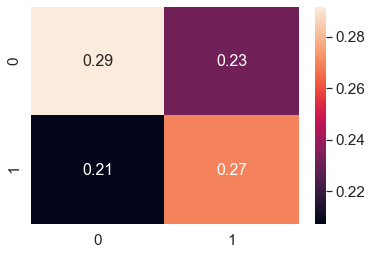

              precision    recall  f1-score   support

          -1       0.58      0.56      0.57       192
           1       0.54      0.57      0.55       175

    accuracy                           0.56       367
   macro avg       0.56      0.56      0.56       367
weighted avg       0.56      0.56      0.56       367



In [40]:
cm = confusion_matrix(y1_test,y_predKNN1) / confusion_matrix(y1_test,y_predKNN1).astype(np.float).sum()
df_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()
strategies_classifiers_score = strategies_classifiers_score.append({'classfier | strategy number':'KNN | 1',
                                                                   'accuracy %':accuracy_score(y1_test, y_predKNN1)*100},
                                                                  ignore_index=True)
print(classification_report(y1_test, y_predKNN1))


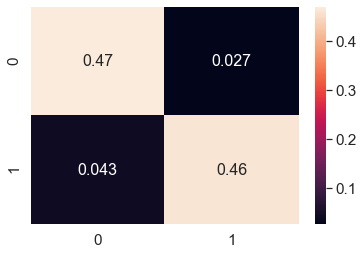

              precision    recall  f1-score   support

          -1       0.92      0.95      0.93       185
           1       0.95      0.91      0.93       188

    accuracy                           0.93       373
   macro avg       0.93      0.93      0.93       373
weighted avg       0.93      0.93      0.93       373



In [41]:
cm = confusion_matrix(y2_test,y_predKNN2) / confusion_matrix(y2_test,y_predKNN2).astype(np.float).sum()
df_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()
strategies_classifiers_score = strategies_classifiers_score.append({'classfier | strategy number':'KNN | 2',
                                                                   'accuracy %':accuracy_score(y2_test, y_predKNN2)*100},
                                                                  ignore_index=True)
print(classification_report(y2_test,y_predKNN2))

### Random forest (RF)

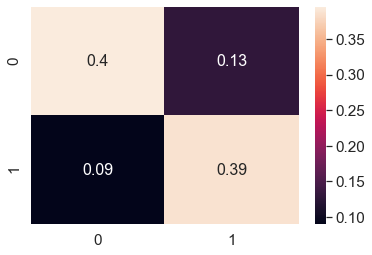

              precision    recall  f1-score   support

          -1       0.81      0.76      0.78       192
           1       0.75      0.81      0.78       175

    accuracy                           0.78       367
   macro avg       0.78      0.78      0.78       367
weighted avg       0.78      0.78      0.78       367



In [42]:
cm = confusion_matrix(y1_test,y_predRF1) / confusion_matrix(y1_test,y_predRF1).astype(np.float).sum()
df_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()
strategies_classifiers_score = strategies_classifiers_score.append({'classfier | strategy number':'RF | 1',
                                                                   'accuracy %':accuracy_score(y1_test, y_predRF1)*100},
                                                                  ignore_index=True)
print(classification_report(y1_test,y_predRF1))

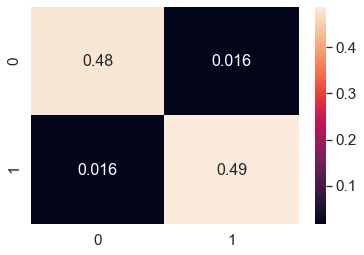

              precision    recall  f1-score   support

          -1       0.97      0.97      0.97       185
           1       0.97      0.97      0.97       188

    accuracy                           0.97       373
   macro avg       0.97      0.97      0.97       373
weighted avg       0.97      0.97      0.97       373



In [43]:
cm = confusion_matrix(y2_test,y_predRF2) / confusion_matrix(y2_test,y_predRF2).astype(np.float).sum()
df_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()
strategies_classifiers_score = strategies_classifiers_score.append({'classfier | strategy number':'RF | 2',
                                                                   'accuracy %':accuracy_score(y2_test, y_predRF2)*100},
                                                                  ignore_index=True)
print(classification_report(y2_test,y_predRF2))

### Gradient boosting (GB)

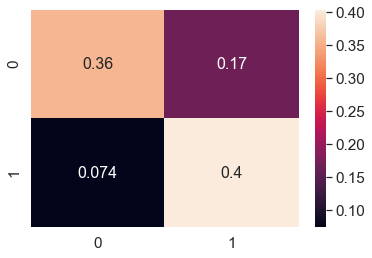

              precision    recall  f1-score   support

          -1       0.83      0.68      0.75       192
           1       0.71      0.85      0.77       175

    accuracy                           0.76       367
   macro avg       0.77      0.76      0.76       367
weighted avg       0.77      0.76      0.76       367



In [44]:
cm = confusion_matrix(y1_test,y_predGB1) / confusion_matrix(y1_test,y_predGB1).astype(np.float).sum()
df_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()
strategies_classifiers_score = strategies_classifiers_score.append({'classfier | strategy number':'GB | 1',
                                                                   'accuracy %':accuracy_score(y1_test, y_predGB1)*100},
                                                                  ignore_index=True)
print(classification_report(y1_test,y_predGB1))

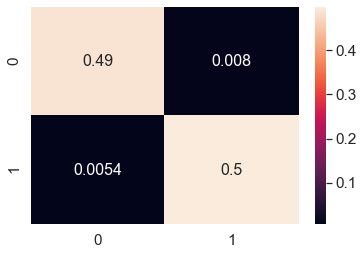

              precision    recall  f1-score   support

          -1       0.99      0.98      0.99       185
           1       0.98      0.99      0.99       188

    accuracy                           0.99       373
   macro avg       0.99      0.99      0.99       373
weighted avg       0.99      0.99      0.99       373



In [45]:
cm = confusion_matrix(y2_test,y_predGB2) / confusion_matrix(y2_test,y_predGB2).astype(np.float).sum()
df_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()
strategies_classifiers_score = strategies_classifiers_score.append({'classfier | strategy number':'GB | 2',
                                                                   'accuracy %':accuracy_score(y2_test, y_predGB2)*100},
                                                                  ignore_index=True)
print(classification_report(y2_test,y_predGB2))

### Support vector machines (SVM)

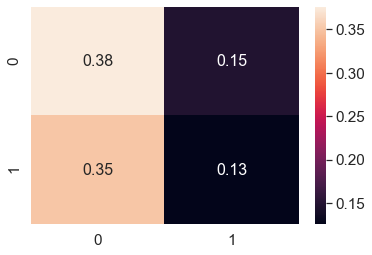

              precision    recall  f1-score   support

          -1       0.52      0.72      0.60       192
           1       0.46      0.26      0.33       175

    accuracy                           0.50       367
   macro avg       0.49      0.49      0.47       367
weighted avg       0.49      0.50      0.47       367



In [46]:
cm = confusion_matrix(y1_test,y_predSVM1) / confusion_matrix(y1_test,y_predSVM1).astype(np.float).sum()
df_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()
strategies_classifiers_score = strategies_classifiers_score.append({'classfier | strategy number':'SVM | 1',
                                                                   'accuracy %':accuracy_score(y1_test, y_predSVM1)*100},
                                                                  ignore_index=True)
print(classification_report(y1_test,y_predSVM1))

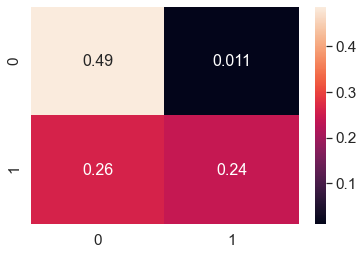

              precision    recall  f1-score   support

          -1       0.65      0.98      0.78       185
           1       0.96      0.48      0.64       188

    accuracy                           0.73       373
   macro avg       0.80      0.73      0.71       373
weighted avg       0.80      0.73      0.71       373



In [47]:
cm = confusion_matrix(y2_test,y_predSVM2) / confusion_matrix(y2_test,y_predSVM2).astype(np.float).sum()
df_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()
strategies_classifiers_score = strategies_classifiers_score.append({'classfier | strategy number':'SVM | 2',
                                                                   'accuracy %':accuracy_score(y2_test, y_predSVM2)*100},
                                                                  ignore_index=True)
print(classification_report(y2_test,y_predSVM2))

### XGBoost classifier

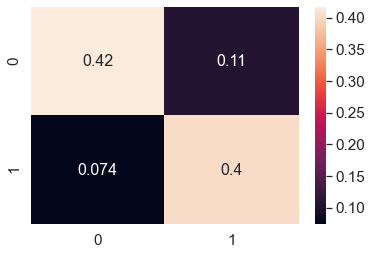

              precision    recall  f1-score   support

          -1       0.85      0.80      0.82       192
           1       0.79      0.85      0.82       175

    accuracy                           0.82       367
   macro avg       0.82      0.82      0.82       367
weighted avg       0.82      0.82      0.82       367



In [48]:
cm = confusion_matrix(y1_test,y_predXGB1) / confusion_matrix(y1_test,y_predXGB1).astype(np.float).sum()
df_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()
strategies_classifiers_score = strategies_classifiers_score.append({'classfier | strategy number':'XGB | 1',
                                                                   'accuracy %':accuracy_score(y1_test, y_predXGB1)*100},
                                                                  ignore_index=True)
print(classification_report(y1_test,y_predXGB1))

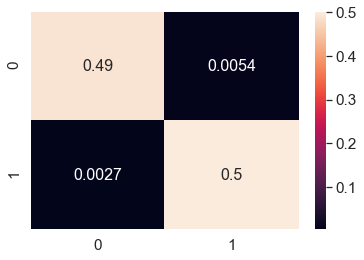

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       185
           1       0.99      0.99      0.99       188

    accuracy                           0.99       373
   macro avg       0.99      0.99      0.99       373
weighted avg       0.99      0.99      0.99       373



In [49]:
cm = confusion_matrix(y2_test,y_predXGB2) / confusion_matrix(y2_test,y_predXGB2).astype(np.float).sum()
df_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()
strategies_classifiers_score = strategies_classifiers_score.append({'classfier | strategy number':'XGB | 2',
                                                                   'accuracy %':accuracy_score(y2_test, y_predXGB2)*100},
                                                                  ignore_index=True)
print(classification_report(y2_test,y_predXGB2))

In [50]:
strategies_classifiers_score = strategies_classifiers_score.sort_values(by='accuracy %')
strategies_classifiers_score

,classfier | strategy number,accuracy %
6,SVM | 1,50.136240
0,KNN | 1,56.130790
7,SVM | 2,72.654155
4,GB | 1,76.021798
2,RF | 1,78.201635
8,XGB | 1,82.016349
1,KNN | 2,93.029491
3,RF | 2,96.782842
5,GB | 2,98.659517
9,XGB | 2,99.195710


Text(0.5, 0, 'Classifier | Strategy number')

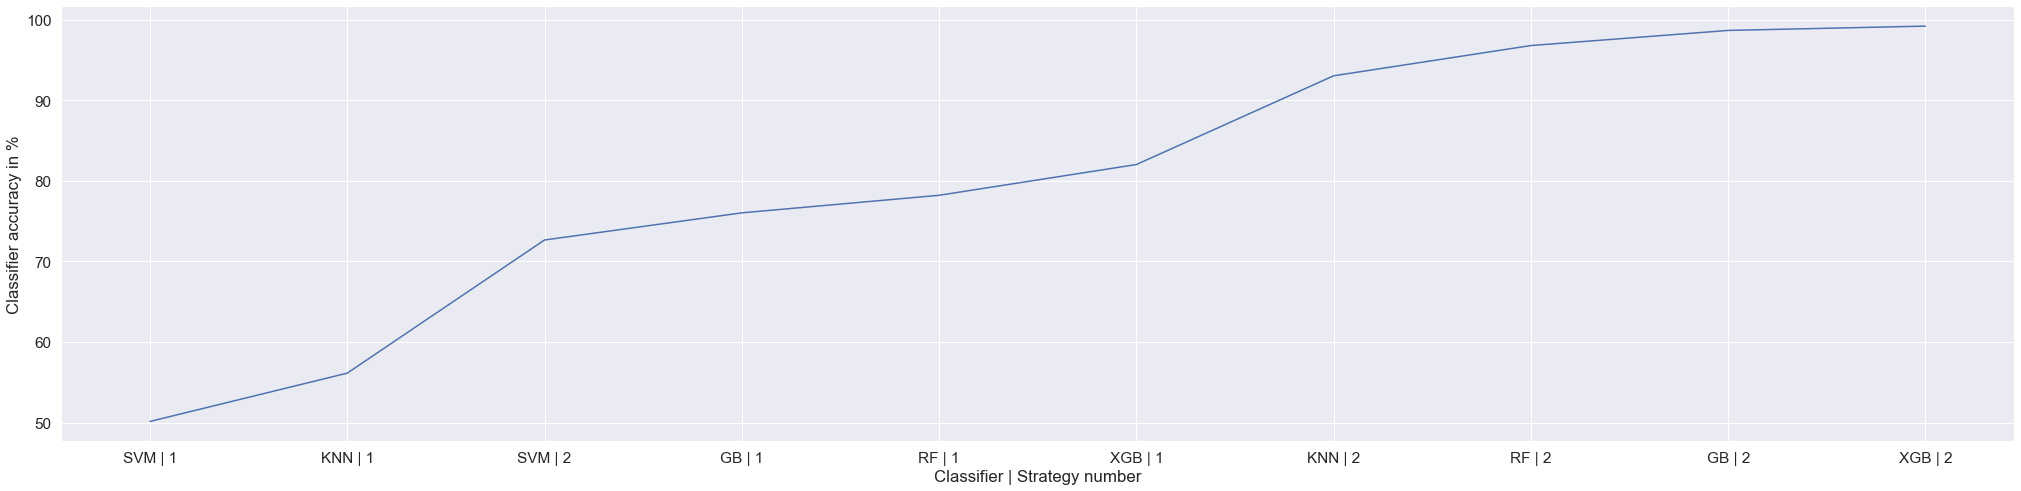

In [51]:
plt.figure(figsize=(35, 8))
plt.plot(strategies_classifiers_score['classfier | strategy number'], strategies_classifiers_score['accuracy %'])
plt.ylabel('Classifier accuracy in %')
plt.xlabel('Classifier | Strategy number')

## Extra credit: try to tune a classifier by changing their default parameters

As part of extra credit I will try to play around with support vector machines' parameters as it is the worst performing classification model

In an effort to find the best hyper-parameters for such classifier, we will use the grid search tuning technique

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
parameters = [
    {"C": [1, 10, 100, 1000], "kernel": ['linear']},
    {"C": [1, 10, 100, 1000], "kernel": ['rbf'], "gamma": [0.5, 0.1, 0.01, 0.001, 0.0001]},
    {"C": [1], "kernel": ['rbf'], "gamma": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
]

In [54]:
gs1 = GridSearchCV(estimator=SVM1, param_grid=parameters, 
                  scoring='accuracy', cv=10, n_jobs=-1)
gs1 = gs1.fit(X1_train, y1_train)
gs2 = GridSearchCV(estimator=SVM2, param_grid=parameters, 
                  scoring='accuracy', cv=10, n_jobs=-1)
gs2 = gs2.fit(X2_train, y2_train)

In [55]:
best_accuracy1 = gs1.best_score_
best_parameters1 = gs1.best_params_

print("Best Strategy 1 Accuracy \t\t\t%.2f" % best_accuracy1)
print("Best Strategy 1 Parameters \t", best_parameters1)

best_accuracy2 = gs2.best_score_
best_parameters2 = gs2.best_params_

print("Best Strategy 2 Accuracy \t\t\t%.2f" % best_accuracy2)
print("Best Strategy 2 Parameters \t", best_parameters2)

Best Strategy 1 Accuracy 			0.99
Best Strategy 1 Parameters 	 {'C': 1000, 'kernel': 'linear'}
Best Strategy 2 Accuracy 			1.00
Best Strategy 2 Parameters 	 {'C': 1000, 'kernel': 'linear'}


Looks like we had an amazing increase in accuracy! Let's try these parameters

In [56]:
SVM1, SVM2 = SVC(C=1000, kernel="linear"),SVC(C=1000, kernel="linear")
SVM1.fit(X1_train, y1_train)
SVM2.fit(X2_train, y2_train)
y_predSVM1 = SVM1.predict(X1_test)
y_predSVM2 = SVM2.predict(X2_test)

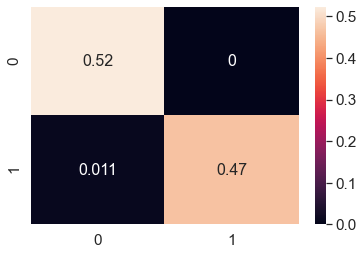

              precision    recall  f1-score   support

          -1       0.98      1.00      0.99       192
           1       1.00      0.98      0.99       175

    accuracy                           0.99       367
   macro avg       0.99      0.99      0.99       367
weighted avg       0.99      0.99      0.99       367



In [57]:
cm = confusion_matrix(y1_test,y_predSVM1) / confusion_matrix(y1_test,y_predSVM1).astype(np.float).sum()
df_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()
strategies_classifiers_score = strategies_classifiers_score.append({'classfier | strategy number':'SVM | 1 - Grid search',
                                                                   'accuracy %':accuracy_score(y1_test, y_predSVM1)*100},
                                                                  ignore_index=True)
print(classification_report(y1_test,y_predSVM1))

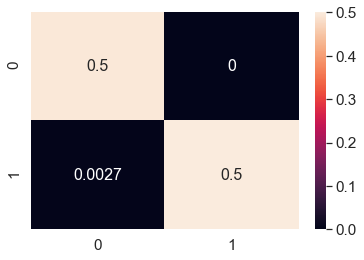

              precision    recall  f1-score   support

          -1       0.99      1.00      1.00       185
           1       1.00      0.99      1.00       188

    accuracy                           1.00       373
   macro avg       1.00      1.00      1.00       373
weighted avg       1.00      1.00      1.00       373



In [58]:
cm = confusion_matrix(y2_test,y_predSVM2) / confusion_matrix(y2_test,y_predSVM2).astype(np.float).sum()
df_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()
strategies_classifiers_score = strategies_classifiers_score.append({'classfier | strategy number':'SVM | 2 - Grid search',
                                                                   'accuracy %':accuracy_score(y2_test, y_predSVM2)*100},
                                                                  ignore_index=True)
print(classification_report(y2_test,y_predSVM2))

In [59]:
#SVM_scores
strategies_classifiers_score = strategies_classifiers_score.sort_values(by='accuracy %')
strategies_classifiers_score

,classfier | strategy number,accuracy %
0,SVM | 1,50.136240
1,KNN | 1,56.130790
2,SVM | 2,72.654155
3,GB | 1,76.021798
4,RF | 1,78.201635
5,XGB | 1,82.016349
6,KNN | 2,93.029491
7,RF | 2,96.782842
8,GB | 2,98.659517
10,SVM | 1 - Grid search,98.910082


98% vs 50% for strategy 1 initially, 99% vs 72% for strategy 2 initially

Text(0.5, 0, 'Classifier | Strategy number')

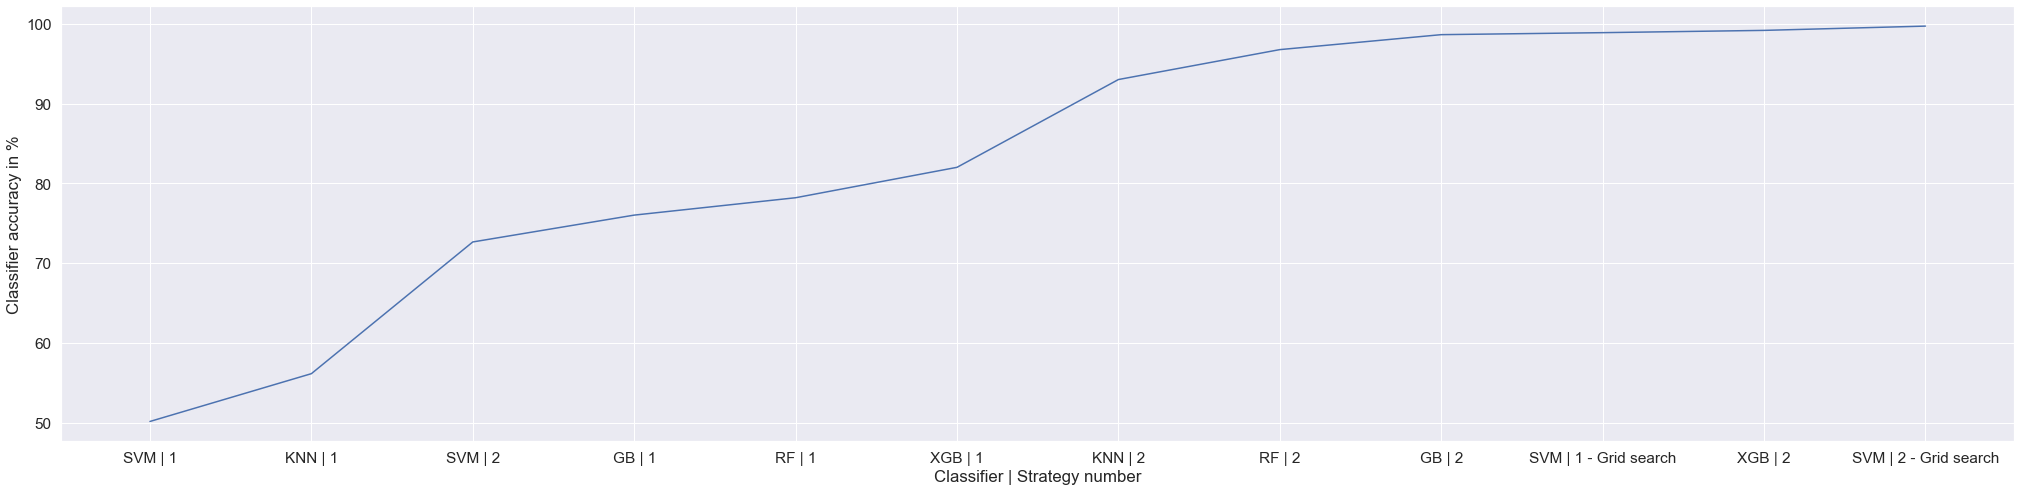

In [60]:
plt.figure(figsize=(35, 8))
plt.plot(strategies_classifiers_score['classfier | strategy number'], strategies_classifiers_score['accuracy %'])
plt.ylabel('Classifier accuracy in %')
plt.xlabel('Classifier | Strategy number')

Let's try one more: Gradient boosting algorithm tuning by trying different learning rates

In [61]:
for lr in [0.01,0.05,0.1,0.25,0.5,0.75,1]:
    GB1, GB2 = GradientBoostingClassifier(learning_rate = lr),GradientBoostingClassifier(learning_rate = lr)
    GB1.fit(X1_train, y1_train)
    GB2.fit(X2_train, y2_train)
    
    print(f'Accuracy score of learning rate = {lr} of training set is {round(GB1.score(X1_train,y1_train)*100,2)} % for strategy 1')
    print(f'Accuracy score of learning rate = {lr} of training set is {round(GB2.score(X2_train, y2_train)*100,2)} % for strategy 2')

Accuracy score of learning rate = 0.01 of training set is 70.69 % for strategy 1
Accuracy score of learning rate = 0.01 of training set is 93.96 % for strategy 2
Accuracy score of learning rate = 0.05 of training set is 81.66 % for strategy 1
Accuracy score of learning rate = 0.05 of training set is 98.59 % for strategy 2
Accuracy score of learning rate = 0.1 of training set is 91.21 % for strategy 1
Accuracy score of learning rate = 0.1 of training set is 99.93 % for strategy 2
Accuracy score of learning rate = 0.25 of training set is 97.34 % for strategy 1
Accuracy score of learning rate = 0.25 of training set is 100.0 % for strategy 2
Accuracy score of learning rate = 0.5 of training set is 99.73 % for strategy 1
Accuracy score of learning rate = 0.5 of training set is 100.0 % for strategy 2
Accuracy score of learning rate = 0.75 of training set is 100.0 % for strategy 1
Accuracy score of learning rate = 0.75 of training set is 100.0 % for strategy 2
Accuracy score of learning rate 

Very high accuracy score for the biggest learning rates.